# Load libraries and data sets

In [2]:
# Load libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
# Load data set "energy consumption in household sector"

path = r'/Users/gomula/Documents/Finalproject'
consump_roadtransport = pd.read_csv(os.path.join(path, '2 Data set', 'Original', 'ten00127_linear.csv','ten00127_linear.csv'), index_col=False)
consump_roadtransport.head()

,DATAFLOW,LAST UPDATE,freq,nrg_bal,siec,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:TEN00127(1.0),14/04/22 11:00:00,A,FC_TRA_ROAD_E,E7000,KTOE,AL,2009,0.0,NaN
1,ESTAT:TEN00127(1.0),14/04/22 11:00:00,A,FC_TRA_ROAD_E,E7000,KTOE,AL,2010,0.0,NaN
2,ESTAT:TEN00127(1.0),14/04/22 11:00:00,A,FC_TRA_ROAD_E,E7000,KTOE,AL,2011,0.0,NaN
3,ESTAT:TEN00127(1.0),14/04/22 11:00:00,A,FC_TRA_ROAD_E,E7000,KTOE,AL,2012,0.0,NaN
4,ESTAT:TEN00127(1.0),14/04/22 11:00:00,A,FC_TRA_ROAD_E,E7000,KTOE,AL,2013,0.0,NaN


In [4]:
# remove redundant columns
consump_roadtransport.drop(['DATAFLOW', 'LAST UPDATE', 'freq', 'OBS_FLAG', 'unit'], axis=1, inplace=True)

In [5]:
# define the name of columns
consump_roadtransport.rename(columns={'geo': 'country-code', 'TIME_PERIOD': 'time-period', 'OBS_VALUE': 'value(KTOE)', 'nrg_bal': 'sector'}, inplace=True)

In [10]:
# define the codes of countries and fuels
country_codes = {'SK':'Slovakia', 'FI':'Finland', 'SE':'Sweden', 'IS':'Iceland','NO':'Norway', 'UK':'United Kingdom',
                 'ME': 'Montenegro','MK':'North Macedonia', 'GE':'Georgia', 'EU27_2020':'European Union - 27 countries (from 2020)', 
                 'AL':'Albania', 'RS':'Serbia', 'TR':'Turkey', 'BA':'Bosnia and Herzegovina', 'MD':'Moldova', 'UA':'Ukraine',  
                 'EA19':'Euro area - 19 countries (from 2015)', 'BE':'Belgium', 'BG':'Bulgaria', 'CZ':'Czechia', 'DK':'Denmark',
                 'DE':'Germany', 'EE':'Estonia', 'IE':'Ireland', 'EL':'Greece', 'ES': 'Spain', 'FR':'France', 'HR':'Croatia',
                 'IT':'Italy', 'CY':'Cyprus', 'LV':'Latvia', 'LT':'Lithuania', 'LU':'Luxembourg', 'HU':'Hungary', 'MT':'Malta',
                 'NL':'Netherlands', 'AT':'Austria', 'PL':'Poland', 'PT':'Portugal', 'RO':'Romania', 'SI':'Slovenia',
                 'EU28':'European Union - 28 countries (2013-2020)', 'LI':'Liechtenstein', 'CH':'Switzerland',
                 'XK':'Kosovo'}
len(country_codes)

45

In [11]:
# define the codes of fuels
energy_codes = {'TOTAL':'Total', 'G3000':'Natural gas', 'O4630':'Liquefied petroleum gases',
                'O4652XR5210B':'Motor gasoline (excluding biofuel portion)', 'R5300':'Biogases','E7000':'Electricity', 
                'O4671XR5220B':'Gas oil and diesel oil (excluding biofuel portion)','R5220B':'Blended biodiesels',
                'R5210B':'Blended biogasoline', 'R5220P':'Pure biodiesels','R5290':'Other liquid biofuels', 
                'R5210P':'Pure biogasoline'}
len(energy_codes)

12

In [12]:
# define code of sectores
sect_codes = {'FC_TRA_ROAD_E':'road-transport'}

In [13]:
# replace country abbreviations by full name
consump_roadtransport['country'] = list(map(country_codes.get, consump_roadtransport['country-code'].tolist()))

In [14]:
# replace energy codes by complete name
consump_roadtransport['energy-type'] = list(map(energy_codes.get, consump_roadtransport['siec'].tolist()))

In [15]:
# replace sector abbreviations by full name
consump_roadtransport['sector'] = list(map(sect_codes.get, consump_roadtransport['sector'].tolist()))

In [16]:
# remove columns: siec & country
consump_roadtransport.drop(['siec', 'country-code'], axis=1, inplace=True)

In [17]:
# put columns in order
consump_roadtransport = consump_roadtransport[['country', 'time-period', 'sector','energy-type', 'value(KTOE)']]
consump_roadtransport.head()

,country,time-period,sector,energy-type,value(KTOE)
0,Albania,2009,road-transport,Electricity,0.0
1,Albania,2010,road-transport,Electricity,0.0
2,Albania,2011,road-transport,Electricity,0.0
3,Albania,2012,road-transport,Electricity,0.0
4,Albania,2013,road-transport,Electricity,0.0


In [18]:
# shape of the dataset
consump_roadtransport.shape

(5916, 5)

In [19]:
# data type of attributes
consump_roadtransport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5916 entries, 0 to 5915
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      5916 non-null   object 
 1   time-period  5916 non-null   int64  
 2   sector       5916 non-null   object 
 3   energy-type  5916 non-null   object 
 4   value(KTOE)  5916 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 231.2+ KB


There is no null values in dataset

In [20]:
# check for mixed data type in df_ords
for col in consump_roadtransport.columns.tolist():
  weird = (consump_roadtransport[[col]].applymap(type) != consump_roadtransport[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (consump_roadtransport[weird]) > 0:
    print (col + ' contains mixed data types')
  else:
    print (col + ' doesn\'t contain mixed data types')

country doesn't contain mixed data types
time-period doesn't contain mixed data types
sector doesn't contain mixed data types
energy-type doesn't contain mixed data types
value(KTOE) doesn't contain mixed data types


In [21]:
# descriptive statisctics
consump_roadtransport.describe()

,time-period,value(KTOE)
count,5916.000000,5916.000000
mean,2014.567951,3232.756200
std,3.431141,18842.549318
min,2009.000000,0.000000
25%,2012.000000,0.000000
50%,2015.000000,6.555000
75%,2018.000000,415.668750
max,2020.000000,270043.353000


the data distribution for time period is ok as it is the annual data, but in value(KTOE) there are lots of outliers which seems to be rational as they are the summation values

<Axes: ylabel='Frequency'>

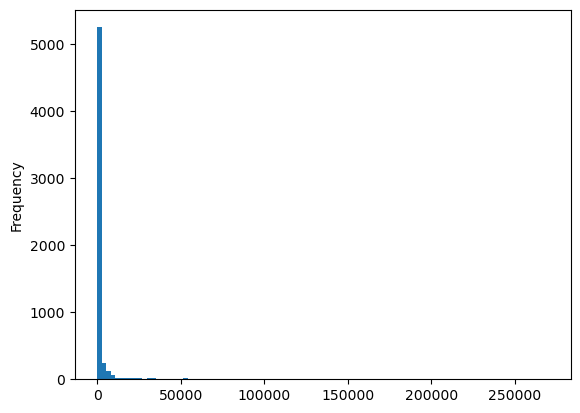

In [22]:
# distribution of value(KTOE)
consump_roadtransport['value(KTOE)'].plot.hist(bins=100)

### Like the other data sets here we have lots of '0' values which seems to be normal as there are lots of unmeasured data or lots of real zero measurements

In [23]:
# value distribution for 'country'
consump_roadtransport['country'].value_counts()

Albania                                      144
Iceland                                      144
Lithuania                                    144
Luxembourg                                   144
Latvia                                       144
Montenegro                                   144
North Macedonia                              144
Malta                                        144
Netherlands                                  144
Norway                                       144
Poland                                       144
Portugal                                     144
Romania                                      144
Serbia                                       144
Sweden                                       144
Slovenia                                     144
Slovakia                                     144
Turkey                                       144
Ukraine                                      144
Austria                                      144
Italy               

In [24]:
# data distribution for 'energy-type'
consump_roadtransport['energy-type'].value_counts()

Electricity                                           493
Natural gas                                           493
Liquefied petroleum gases                             493
Motor gasoline (excluding biofuel portion)            493
Gas oil and diesel oil (excluding biofuel portion)    493
Blended biogasoline                                   493
Pure biogasoline                                      493
Blended biodiesels                                    493
Pure biodiesels                                       493
Other liquid biofuels                                 493
Biogases                                              493
Total                                                 493
Name: energy-type, dtype: int64

In [25]:
# data distribution for sector
consump_roadtransport['sector'].value_counts()

road-transport    5916
Name: sector, dtype: int64

In [26]:
# remove rows related to 'EU27_2020' & 'EA19' & 'EA28' as they are summations for contries in EU and they are not helpful in our analysis
consump_roadtransport.drop(consump_roadtransport[consump_roadtransport['country'].isin(['European Union - 27 countries (from 2020)',
            'Euro area - 19 countries (from 2015)', 'European Union - 28 countries (2013-2020)'])].index, inplace=True)
set(consump_roadtransport['country'])

{'Albania',
 'Austria',
 'Belgium',
 'Bosnia and Herzegovina',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Italy',
 'Kosovo',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Moldova',
 'Montenegro',
 'Netherlands',
 'North Macedonia',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Turkey',
 'Ukraine',
 'United Kingdom'}

In [27]:
# check for null values again
consump_roadtransport.isnull().sum()

country        0
time-period    0
sector         0
energy-type    0
value(KTOE)    0
dtype: int64

In [28]:
# check for duplicity
consump_roadtransport[consump_roadtransport.duplicated()]

,country,time-period,sector,energy-type,value(KTOE)


There is no duplicated row

In [29]:
# reset index for new dataset
consump_roadtransport.reset_index(drop=True, inplace=True)
consump_roadtransport

,country,time-period,sector,energy-type,value(KTOE)
0,Albania,2009,road-transport,Electricity,0.000
1,Albania,2010,road-transport,Electricity,0.000
2,Albania,2011,road-transport,Electricity,0.000
3,Albania,2012,road-transport,Electricity,0.000
4,Albania,2013,road-transport,Electricity,0.000
...,...,...,...,...,...
5623,Kosovo,2016,road-transport,Total,393.908
5624,Kosovo,2017,road-transport,Total,406.918
5625,Kosovo,2018,road-transport,Total,426.364
5626,Kosovo,2019,road-transport,Total,427.049


# The final form of the 'consum_roadtransport' data frame will be as follow

In [30]:
consump_roadtransport.head()

,country,time-period,sector,energy-type,value(KTOE)
0,Albania,2009,road-transport,Electricity,0.0
1,Albania,2010,road-transport,Electricity,0.0
2,Albania,2011,road-transport,Electricity,0.0
3,Albania,2012,road-transport,Electricity,0.0
4,Albania,2013,road-transport,Electricity,0.0


In [31]:
consump_roadtransport.shape

(5628, 5)

In [32]:
consump_roadtransport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5628 entries, 0 to 5627
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      5628 non-null   object 
 1   time-period  5628 non-null   int64  
 2   sector       5628 non-null   object 
 3   energy-type  5628 non-null   object 
 4   value(KTOE)  5628 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 220.0+ KB


In [33]:
consump_roadtransport.describe()


,time-period,value(KTOE)
count,5628.000000,5628.000000
mean,2014.571429,1408.458505
std,3.430031,5205.326314
min,2009.000000,0.000000
25%,2012.000000,0.000000
50%,2015.000000,4.122000
75%,2018.000000,327.261250
max,2020.000000,54584.037000


<Axes: ylabel='Frequency'>

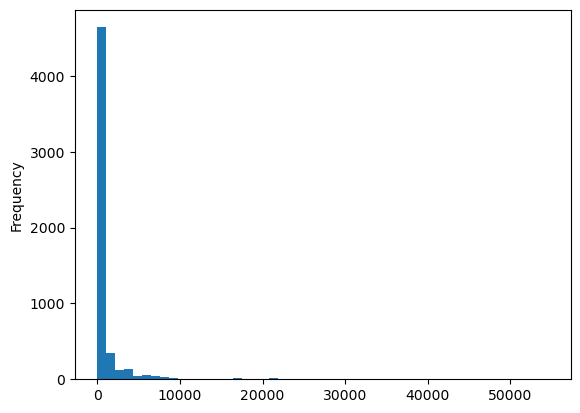

In [34]:
consump_roadtransport['value(KTOE)'].plot.hist(bins=50)

In [35]:
# Save data set in pickle and csv formats
consump_roadtransport.to_csv(os.path.join(path, '2 Data set', 'Modified', 'consump_roadtransport.csv'))
consump_roadtransport.to_pickle(os.path.join(path, '2 Data set', 'Modified', 'consump_roadtransport.pkl'))